<a href="https://colab.research.google.com/github/Imotep460/FastAIBlog/blob/master/_notebooks/2021-02-16-Kapitel-2%3A-hotdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.9MB/s 
     |████████████████████████████████| 194kB 33.0MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 1.2MB 29.8MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
configId = ""

In [ ]:
subscriptionKey = ""

In [ ]:
def search_images_bing_new(key, term, customConfigId, min_sz=128):
	url = 'https://api.bing.microsoft.com/v7.0/custom/images/search?' + 'q=' + term + '&' + 'customconfig=' + customConfigId + '&' + 'count=150'
	r = requests.get(url, headers={'Ocp-Apim-Subscription-Key': key})
	search_results = r.json()
	return L([img["thumbnailUrl"] + ".jpg" for img in search_results["value"][:150]])

In [ ]:
hotdogImages = search_images_bing_new(subscriptionKey, "hotdog", configId)

In [ ]:
firstHotdogImage = hotdogImages[0]
hotdogDest = "hotdog.jpg"
download_url(firstHotdogImage, hotdogDest)

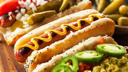

In [ ]:
hotdogImg = Image.open(hotdogDest)
hotdogImg.to_thumb(128,128)

In [ ]:
imagesPath = Path('images')
if not imagesPath.exists:
  imagesPath.mkdir()

In [ ]:
hotdogPath = Path(str(imagesPath) + '/hotdogs')
if not hotdogPath.exists():
  hotdogPath.mkdir()
download_images(hotdogPath, urls = hotdogImages)

In [ ]:
hotdogImageFiles = get_image_files(hotdogPath)

In [ ]:
failedHotdogs = verify_images(hotdogImageFiles)
failedHotdogs

(#0) []

In [ ]:
foodImages = search_images_bing_new(subscriptionKey, "food -hotdog", configId)
foodPath = Path(str(imagesPath) + '/food')
if not foodPath.exists():
  foodPath.exists()
download_images(foodPath, urls=foodImages)
foodImageFiles = get_image_files(foodPath)
failedFood = verify_images(foodImageFiles)
failedFood

(#0) []

In [ ]:
foods = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
foods = foods.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [ ]:
dls = foods.dataloaders(imagesPath)

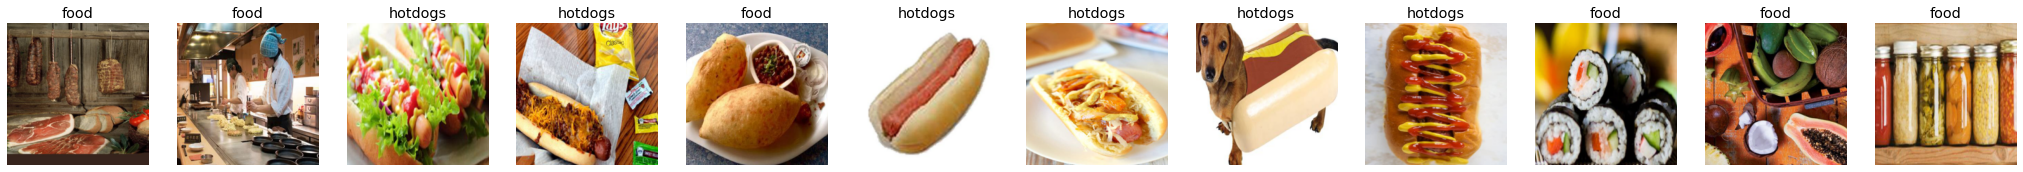

In [ ]:
dls.valid.show_batch(max_n=12, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.251222,0.799934,0.333333,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.697134,0.601997,0.266667,00:03
1,0.613012,0.463671,0.183333,00:03
2,0.512704,0.417398,0.133333,00:03
3,0.414984,0.428409,0.133333,00:03
4,0.356606,0.449707,0.150000,00:03
5,0.310091,0.449083,0.100000,00:03
6,0.286895,0.445496,0.083333,00:03
7,0.256358,0.448062,0.083333,00:03


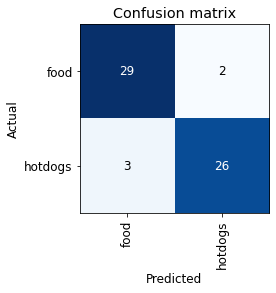

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()

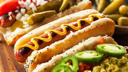

In [ ]:
Image.open("hotdog.jpg").to_thumb(128,128)

In [ ]:
pred,pred_idx,probs = learn.predict("hotdog.jpg")
f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

'Prediction: hotdogs; Probability: 0.9990'

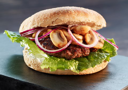

In [ ]:
Image.open("burger.jpg").to_thumb(128,128)

In [ ]:
pred,pred_idx,probs = learn.predict("burger.jpg")
f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

'Prediction: food; Probability: 0.9995'

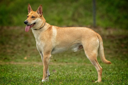

In [ ]:
Image.open("dog.jpg").to_thumb(128,128)

In [ ]:
pred,pred_idx,probs = learn.predict("dog.jpg")
f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

'Prediction: food; Probability: 0.9954'

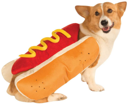

In [ ]:
Image.open("hotdogdog.jpg").to_thumb(128,128)

In [ ]:
pred,pred_idx,probs = learn.predict("hotdogdog.jpg")
f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

'Prediction: hotdogs; Probability: 0.8661'